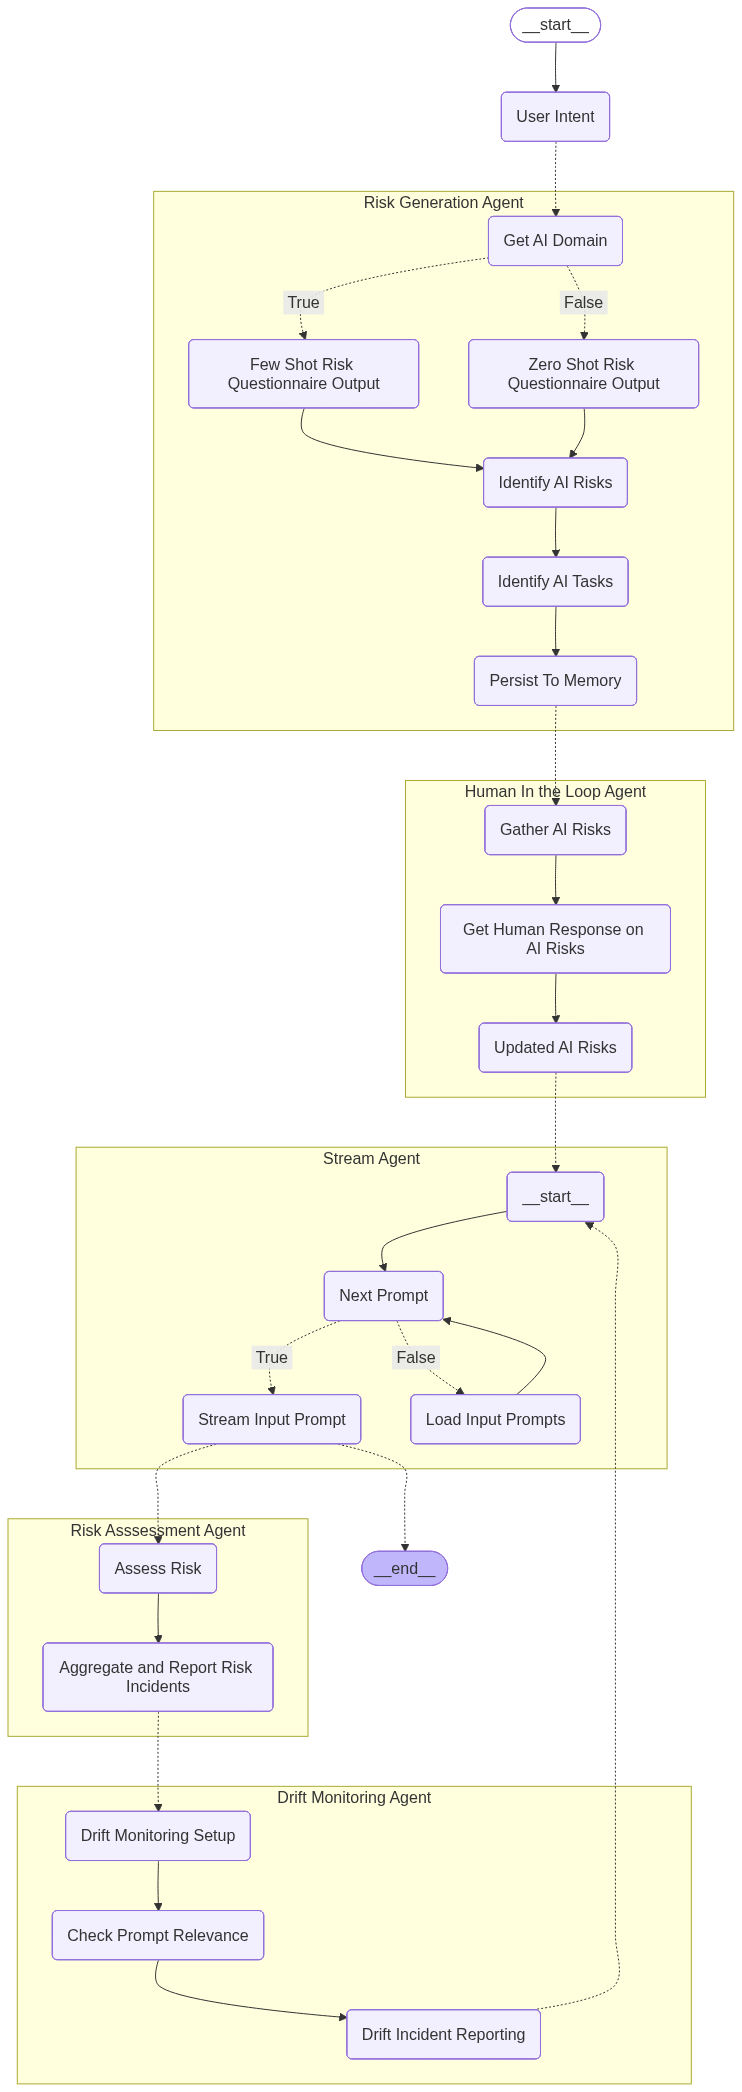

In [4]:
from IPython.display import Image, display
from langgraph.checkpoint.memory import MemorySaver
from gaf_guard.core.agents import (
    OrchestratorAgent,
    RiskGeneratorAgent,
    RisksAssessmentAgent,
    DriftMonitoringAgent,
    HumanInTheLoopAgent,
    StreamAgent,
)
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod
import asyncio

risk_generator = RiskGeneratorAgent()
risk_generator.compile(MemorySaver(), inference_engine=None, taxonomy="")
hitl = HumanInTheLoopAgent()
hitl.compile(MemorySaver())
stream = StreamAgent()
stream.compile(MemorySaver())
risk_assessor = RisksAssessmentAgent()
risk_assessor.compile(MemorySaver(), inference_engine=None, taxonomy="")
drift_monitor = DriftMonitoringAgent()
drift_monitor.compile(MemorySaver(), inference_engine=None)

agent = OrchestratorAgent()
agent.compile(
    MemorySaver(),
    RiskGeneratorAgent=risk_generator,
    HumanInTheLoopAgent=hitl,
    StreamAgent=stream,
    RisksAssessmentAgent=risk_assessor,
    DriftMonitoringAgent=drift_monitor,
)

display(
    Image(
        agent.workflow.get_graph(xray=3).draw_mermaid_png(
            curve_style=CurveStyle.CATMULL_ROM, wrap_label_n_words=20, max_retries=50
        )
    )
)